###### Staten Island, NY OSMNx Walking Network + Simulation
Author: Callie Clark
Last Updated: 5/21/2024

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd
import numpy as np
import networkx as nx
import osmnx as ox
import json

%matplotlib inline
ox.__version__

from scipy.spatial import cKDTree
from TT_functions import *
import random

In [2]:
year='2023'

In [3]:
G = ox.graph_from_place("Staten Island, New York, USA", network_type="walk")
G = ox.utils_graph.get_largest_component(G, strongly=True)

G = ox.add_edge_speeds(G)
G_ = ox.speed.add_edge_travel_times(G, precision=1)

/tmp/ipykernel_52018/2943891741.py:2: FutureWarning: The `get_largest_component` function is deprecated and will be removed in the v2.0.0 release. Replace it with `truncate.largest_component` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.utils_graph.get_largest_component(G, strongly=True)
/tmp/ipykernel_52018/2943891741.py:5: FutureWarning: The `add_edge_travel_times` function has moved to the `routing` module. Calling `speed.add_edge_travel_times` is deprecated and will be removed in the v2.0.0 release. Call it via `routing.add_edge_travel_times` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G_ = ox.speed.add_edge_travel_times(G, precision=1)
/home/cusp/crc9978/.conda/envs/ox/lib/python3.12/site-packages/osmnx/speed.py:67: FutureWarning: The `precision` parameter is deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues

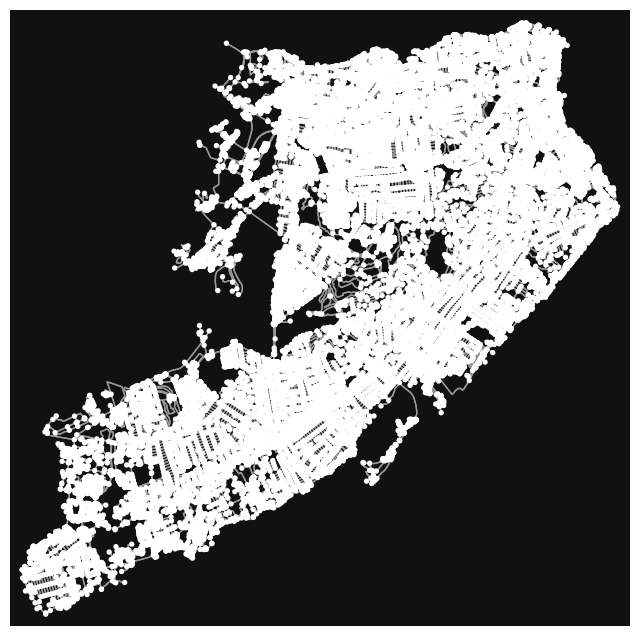

In [4]:
fig, ax = ox.plot_graph(G)

In [5]:

for edge in G.edges:
    edge_obj = G[edge[0]][edge[1]][edge[2]]
    road_type=edge_obj['highway']
    
    distance = edge_obj['length']/1000 # Convert from m to km

    urban_tt = distance/(4.5 /3600)# km/seconds #assuming average wallking speed of 4.5 km/hour (same as google)--> adjust for women (if studies support they are usually FP goers)

    G[edge[0]][edge[1]][edge[2]]['urban_tt'] = round(urban_tt,2)


In [6]:
gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)
gdf_edges

/tmp/ipykernel_52018/232611469.py:1: FutureWarning: The `graph_to_gdfs` function has moved to the `convert` module. Calling `utils_graph.graph_to_gdfs` is deprecated and will be removed in the v2.0.0 release. Call it via `convert.graph_to_gdfs` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)


osmid                  name  \
u           v           key                                                   
42943494    8679650019  0                     5710711      Homestead Avenue   
            42975190    0                   275273131       Heberton Avenue   
            42967822    0                   275273131       Heberton Avenue   
42943497    8676462550  0                     5710711      Homestead Avenue   
            42997586    0                   275273133  Port Richmond Avenue   
...                                               ...                   ...   
11913254775 9951972264  0                  1284102948                   NaN   
            11913254774 0                  1284102948                   NaN   
11913254778 5490255952  0                     5711905          Mosel Avenue   
            5490255950  0                     5711905          Mosel Avenue   
            9951972276  0    [1086125234, 1284102949]                   NaN   

                                 highway  oneway reversed   length  speed_kph  \
u           v           key                                                     
42943494    8679650019  0    residential   False    False    7.572       38.7   
            42975190    0    residential   False    False   77.274       38.7   
            42967822    0    residential   False     True   86.158       38.7   
42943497    8676462550  0    residential   False     True    8.909       38.7   
            42997586    0       tertiary   False    False   58.111       43.0   
...                                  ...     ...      ...      ...        ...   
11913254775 9951972264  0        footway   False    False   32.782       38.9   
            11913254774 0        footway   False     True   27.647       38.9   
11913254778 5490255952  0       tertiary   False     True   30.010       43.0   
            5490255950  0       tertiary   False    False   45.147       43.0   
            9951972276  0        footway   False     True  301.957       38.9   

                             travel_time  urban_tt  \
u           v           key                          
42943494    8679650019  0            0.7      6.06   
            42975190    0            7.2     61.82   
            42967822    0            8.0     68.93   
42943497    8676462550  0            0.8      7.13   
            42997586    0            4.9     46.49   
...                                  ...       ...   
11913254775 9951972264  0            3.0     26.23   
            11913254774 0            2.6     22.12   
11913254778 5490255952  0            2.5     24.01   
            5490255950  0            3.8     36.12   
            9951972276  0           27.9    241.57   

                                                                      geometry  \
u           v           key                                                      
42943494    8679650019  0    LINESTRING (-74.13628 40.63047, -74.13635 40.6...   
            42975190    0    LINESTRING (-74.13628 40.63047, -74.13686 40.6...   
            42967822    0    LINESTRING (-74.13628 40.63047, -74.13562 40.6...   
42943497    8676462550  0    LINESTRING (-74.13837 40.63159, -74.13829 40.6...   
            42997586    0    LINESTRING (-74.13837 40.63159, -74.13880 40.6...   
...                                                                        ...   
11913254775 9951972264  0    LINESTRING (-74.07942 40.61027, -74.07958 40.6...   
            11913254774 0    LINESTRING (-74.07942 40.61027, -74.07928 40.6...   
11913254778 5490255952  0    LINESTRING (-74.07865 40.61168, -74.07849 40.6...   
            5490255950  0    LINESTRING (-74.07865 40.61168, -74.07878 40.6...   
            9951972276  0    LINESTRING (-74.07865 40.61168, -74.07877 40.6...   

                            lanes maxspeed bridge service access junction  \
u           v           key                                                 
42943494    8679650019  0     NaN      NaN

In [7]:
gdf_edges.describe()

,length,speed_kph,travel_time,urban_tt
count,127418.000000,127418.000000,127418.000000,127418.000000
mean,51.941695,36.864010,5.093057,41.553348
std,71.611917,5.876611,7.200953,57.289531
min,0.254000,16.100000,0.000000,0.200000
25%,8.756000,38.700000,0.900000,7.000000
50%,25.439000,38.900000,2.600000,20.350000
75%,70.791000,38.900000,6.900000,56.630000
max,2952.791000,56.300000,401.100000,2362.230000


# Calculate TT

In [8]:
census_tract=pd.read_csv('geo_files/census_tract_centroid.csv',index_col=0)
census_tract=census_tract[(census_tract.BoroName=='Staten Island')]
census_tract['node']=ox.distance.nearest_nodes(G, list(census_tract['lon']), list(census_tract['lat']), return_dist=False)
census_tract.head(n=3)

,GEOID,BoroName,NTA2020,lon,lat,centroid,node
1258,36085000300,Staten Island,SI0101,-74.075277,40.641426,POINT (-74.07527680610576 40.64142615534825),6821707281
1259,36085000600,Staten Island,SI0103,-74.065165,40.615340,POINT (-74.0651643509658 40.615339715448656),5490546068
1260,36085000700,Staten Island,SI0101,-74.082389,40.646090,POINT (-74.08238868230106 40.64609021398698),6821653313


In [9]:
census_tract_csv=census_tract[['GEOID','node']]
census_tract_csv.rename(columns={'node':'walk_node'},inplace=True)
census_tract_csv.set_index(keys='GEOID',inplace=True)
#census_tract_csv.to_csv('~/node_data/CT_nodes_walk_staten.csv')

/tmp/ipykernel_52018/2347268262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_tract_csv.rename(columns={'node':'walk_node'},inplace=True)


In [10]:

fp_df=gpd.read_file("~/FP_data/food_pantry_schedule_final.geojson",index_col=0)
fp_df=fp_df[(fp_df.BoroName=='Staten Island')]
fp_df['node']=ox.distance.nearest_nodes(G, list(fp_df['lng']), list(fp_df['lat']), return_dist=False)
fp_df_csv=fp_df[['id','node']]
fp_df_csv.rename(columns={'node':'walk_node'},inplace=True)
fp_df_csv.set_index(keys='id',inplace=True)
fp_node_map=dict(zip(fp_df_csv['walk_node'],fp_df_csv.index))
#fp_df_csv.to_csv('~/node_data/fp_nodes_walk_staten.csv')

/tmp/ipykernel_52018/3010428401.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fp_df_csv.rename(columns={'node':'walk_node'},inplace=True)


In [11]:
CT_gpd = gpd.GeoDataFrame(
    census_tract, geometry=gpd.points_from_xy(census_tract.lon, census_tract.lat))
CT_gpd.set_crs('4326',inplace=True)

,GEOID,BoroName,NTA2020,lon,lat,centroid,node,geometry
1258,36085000300,Staten Island,SI0101,-74.075277,40.641426,POINT (-74.07527680610576 40.64142615534825),6821707281,POINT (-74.07528 40.64143)
1259,36085000600,Staten Island,SI0103,-74.065165,40.615340,POINT (-74.0651643509658 40.615339715448656),5490546068,POINT (-74.06517 40.61534)
1260,36085000700,Staten Island,SI0101,-74.082389,40.646090,POINT (-74.08238868230106 40.64609021398698),6821653313,POINT (-74.08239 40.64609)
1261,36085000800,Staten Island,SI0103,-74.067694,40.611922,POINT (-74.06769338606225 40.611922012515876),11214859952,POINT (-74.06769 40.61192)
1262,36085000900,Staten Island,SI0101,-74.082856,40.642204,POINT (-74.08285642578305 40.64220416387524),10241350797,POINT (-74.08286 40.64220)
...,...,...,...,...,...,...,...,...
2272,36085014700,Staten Island,SI0105,-74.116418,40.619264,POINT (-74.1164182706296 40.619263601628035),11599295325,POINT (-74.11642 40.61926)
2307,36085001800,Staten Island,SI9561,-74.058533,40.601518,POINT (-74.05853320685372 40.60151747293364),5490499092,POINT (-74.05853 40.60152)
2310,36085002002,Staten Island,SI0201,-74.070324,40.601478,POINT (-74.07032352061896 40.60147842202535),8268155444,POINT (-74.07032 40.60148)
2317,36085011204,Staten Island,SI9592,-74.097305,40.568732,POINT (-74.09730461298084 40.56873175053539),10157530378,POINT (-74.09730 40.56873)


In [13]:
with open('node_data/walk_node_county_map_4b.json') as f:
    node_county_map_4b = json.load(f)
node_county_dict=dict(zip(census_tract['node'],census_tract['BoroName']))
dict_combined=node_county_map_4b | node_county_dict
with open('node_data/walk_node_county_map.json', 'w') as f:
    # write the dictionary to the file in JSON format
    json.dump(dict_combined, f)

In [18]:
df_tt=make_tt_df(G,gdf_nodes,fp_df,CT_gpd,node_county_dict,mode='Walk',k_nearest=10)
df_tt

Mo_period_1
urban_tt
Mo_period_2
urban_tt
Mo_period_3
urban_tt
Mo_period_4
urban_tt
Tu_period_1
urban_tt
Tu_period_2
urban_tt
Tu_period_3
urban_tt
Tu_period_4
urban_tt
We_period_1
urban_tt
We_period_2
urban_tt
We_period_3
urban_tt
We_period_4
urban_tt
Th_period_1
urban_tt
Th_period_2
urban_tt
Th_period_3
urban_tt
Th_period_4
urban_tt
Fr_period_1
urban_tt
Fr_period_2
urban_tt
Fr_period_3
urban_tt
Fr_period_4
urban_tt
Sa_period_1
urban_tt
Sa_period_2
urban_tt
Sa_period_3
urban_tt
Sa_period_4
urban_tt
Su_period_1
urban_tt
Su_period_2
urban_tt
Su_period_3
urban_tt
Su_period_4
urban_tt


,Mo_period_1_nearest,Mo_period_1_tt,Mo_period_1_tt_3,Mo_period_2_nearest,Mo_period_2_tt,Mo_period_2_tt_3,Mo_period_3_nearest,Mo_period_3_tt,Mo_period_3_tt_3,Mo_period_4_nearest,...,Su_period_1_tt_3,Su_period_2_nearest,Su_period_2_tt,Su_period_2_tt_3,Su_period_3_nearest,Su_period_3_tt,Su_period_3_tt_3,Su_period_4_nearest,Su_period_4_tt,Su_period_4_tt_3
6821707281,11595829298,11.46,54.20,11595829298,11.46,16.01,7762066911,74.56,85.20,7762066911,...,74.56,43018378,20.37,49.91,43018378,20.37,34.05,10295523850,40.88,40.88
5490546068,11595829298,35.26,37.10,11595829298,35.26,37.10,5490280653,38.02,75.58,7762066911,...,96.24,43018378,28.63,69.17,10295523850,27.8,28.08,10295523850,27.8,27.80
6821653313,11595829298,19.3,52.82,11250154345,9.27,14.86,7762066911,66.65,86.71,7762066911,...,66.65,43018378,28.45,48.76,43018378,28.45,41.98,10295523850,48.74,48.74
11214859952,5490280653,33.61,35.01,5490280653,33.61,35.01,5490280653,33.61,72.55,7762066911,...,95.65,43018378,31.0,70.29,10295523850,24.28,26.52,10295523850,24.28,24.28
10241350797,11595829298,20.72,54.95,11250154345,13.57,16.32,7762066911,70.95,87.86,7762066911,...,70.95,43018378,29.87,50.59,43018378,29.87,42.88,10295523850,49.38,49.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11599295325,6900265219,34.33,38.85,7761494606,29.33,33.64,7762066911,37.5,49.04,7762066911,...,37.50,5490169252,35.19,37.23,7762066889,37.34,41.36,7762066911,37.5,43.37
5490499092,42993472,23.16,34.04,42993472,23.16,34.04,5490280653,23.16,76.21,7762066911,...,108.86,43018378,49.16,86.24,10295523850,48.29,48.58,10295523850,48.29,48.29
8268155444,5490280653,15.61,30.05,5490280653,15.61,30.05,5490280653,15.61,62.66,7762066911,...,92.76,43018378,51.42,76.26,10295523850,39.85,43.71,10295523850,39.85,39.85
10157530378,42993472,59.69,63.97,42993472,59.69,63.97,5490280653,62.55,86.77,7762066911,...,128.11,43018378,115.01,122.97,10295523850,94.18,101.12,10295523850,94.18,94.18


In [19]:
#map GEOIDS to OSMNx nodes
df_tt_richmond_=census_tract_csv.merge(df_tt,left_on='walk_node',right_index=True).drop(columns=['walk_node'])
#maps FP nodes to FP IDs
for col in [i for i in df_tt_richmond_.columns if 'nearest' in i]:
    df_tt_richmond_[col]=df_tt_richmond_[col].map(fp_node_map)
    
for col in [i for i in df_tt_richmond_.columns if 'tt' in i]:
    df_tt_richmond_[col]=df_tt_richmond_[col].astype('float')
    
df_tt_richmond_.to_csv('~/travel_time_df/df_tt_walk_richmond_k10.csv')


In [16]:
df_tt_richmond_

,Mo_period_1_nearest,Mo_period_1_tt,Mo_period_1_stops,Mo_period_2_nearest,Mo_period_2_tt,Mo_period_2_stops,Mo_period_3_nearest,Mo_period_3_tt,Mo_period_3_stops,Mo_period_4_nearest,...,Su_period_1_stops,Su_period_2_nearest,Su_period_2_tt,Su_period_2_stops,Su_period_3_nearest,Su_period_3_tt,Su_period_3_stops,Su_period_4_nearest,Su_period_4_tt,Su_period_4_stops
GEOID,,,,,,,,,,,,,,,,,,,,,
36085000300,85343,11.4595,3.0,85343,11.4595,3.0,83916,74.562667,12.0,83916,...,12.0,85326,20.371333,0.0,85326,20.371333,0.0,Plentiful-1511,40.883333,4.0
36085000600,85343,35.260167,6.0,85343,35.260167,6.0,84301,38.017833,6.0,83916,...,15.0,85326,28.633833,2.0,Plentiful-1511,27.795833,2.0,Plentiful-1511,27.795833,2.0
36085000700,85343,19.302167,0.0,FPC-610,9.2735,0.0,83916,66.6545,9.0,83916,...,9.0,85326,28.4465,1.0,85326,28.4465,1.0,Plentiful-1511,48.742,0.0
36085000800,84301,33.608,5.0,84301,33.608,5.0,84301,33.608,5.0,83916,...,15.0,85326,30.9995,0.0,Plentiful-1511,24.281333,1.0,Plentiful-1511,24.281333,1.0
36085000900,85343,20.724167,2.0,FPC-610,13.5665,0.0,83916,70.9475,9.0,83916,...,9.0,85326,29.8685,3.0,85326,29.8685,3.0,Plentiful-1511,49.383,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36085014700,81020,34.325,0.0,81260,29.3275,2.0,83916,37.496333,2.0,83916,...,2.0,FPC-620,35.193333,3.0,85454,37.342667,2.0,83916,37.496333,2.0
36085001800,FPC-382,23.160167,3.0,FPC-382,23.160167,3.0,84301,23.164333,3.0,83916,...,23.0,85326,49.160833,7.0,Plentiful-1511,48.291167,3.0,Plentiful-1511,48.291167,3.0
36085002002,84301,15.609667,2.0,84301,15.609667,2.0,84301,15.609667,2.0,83916,...,19.0,85326,51.4195,4.0,Plentiful-1511,39.853333,4.0,Plentiful-1511,39.853333,4.0


In [ ]:
county = gpd.read_file('geo_files/cb_2020_36_tract_500k.shp')
print("Shape of the dataframe: {}".format(county.shape))
print("Projection of dataframe: {}".format(county.crs))
nyc_CT=county[county.NAMELSADCO.isin(['Bronx County','Kings County', 'Queens County','Richmond County','New York County'])]
nyc_CT.set_crs(4269,allow_override=True)
nyc_CT['centroid']=nyc_CT.geometry.to_crs(4629).centroid
nyc_CT.head(n=2)

fig,(ax1)=plt.subplots(ncols=(1),nrows=(1),figsize=(12,12))
nyc_CT.plot(ax=ax1,alpha=0.3,color='grey',zorder=1,edgecolor='black')
node_list=list(CT_gpd[CT_gpd['NAMELSADCO']=='Richmond County'].node.values)
for i in node_list:
    gdf_nodes[gdf_nodes.index==i].plot(ax=ax1)


In [ ]:
open_fp_dict=get_time_table(fp_df_richmond)
time_period='Th_morning'
fp_node=list(open_fp_dict[time_period])
fp_df_open=fp_df_richmond.loc[fp_df_richmond['node'].isin(fp_node)]

fig,(ax1)=plt.subplots(ncols=(1),nrows=(1),figsize=(12,12))
nyc_CT.plot(ax=ax1,alpha=0.3,color='grey',zorder=1,edgecolor='black');

fp_df_open.plot(ax=ax1,label='FP')
fp_df[fp_df['node']==42870433].plot(ax=ax1,color='green',label='Closest FP')
CT_gpd[CT_gpd['node']==42733367].plot(ax=ax1,color='red',label='CT')
ax1.legend();